Tedacloud validation for toy and real datasets
* Toy datasets: S1, S2, gaussian, shapes, smiles and spirals
* Real datasets: iris and adl (activity daily living)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import csv
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn import metrics
import tqdm
import time
from os.path import join
from tedacloud import *

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data[:, :4], columns=['feature_1','feature_2','feature_3', 'feature_4'])

In [ ]:
df = pd.DataFrame(iris.data[:, :])
df.head()

### Toy datasets

#### S1 e S2

In [ ]:
# 1 - create a dic to store all datasets and label solutions
dic_solution = {}

# 2 - list of dataset names for analysis
list_dataset = ['s1','s2']

# 3 - list of m's (qtd of standart deviation)
list_sd = [1.8, 2.0, 3.0]

for name_dataset in list_dataset: 
    
    start_time = time.time()
    
    # 4 - read and normalize the dataset
    df = normalize(create_dataset(name_dataset))
    
    # 5 - Shuffling dataset (if needed)
    # df.sample(frac=1) #shuffle dataframe
    # df = df.sample(frac=1).reset_index(drop=True) #shuffle dataframe and reset index
    
    # 6 - get all the key features
    features = np.sort([feature for feature in df.keys() if 'feature' in feature])
    
    # 7 - create tedacloud class for dataset
    tedacloud = Tedacloud(df)
    
    for sd in list_sd:    
        
        name='tedacloud'+'_'+'m='+str(sd)+'_'+'dataset='+name_dataset
        
        # 8 - fit the dataset using specific m
        tedacloud.Fit(sd)
        
        # 9 - store the solution in a dictionary
        dic_solution[name] = {'dataset': df[features], 'label_round_truth': df['Label'], 'label_solution': tedacloud.label_solution_adjusted}
        
        # 10 - plot results
        fig = plt.figure()
        plt.scatter(df['feature_1'].values, df['feature_2'].values, c=dic_solution[name]['label_solution'], cmap='jet', edgecolor='k')
        for key in tedacloud.clus_teda.keys():
            plt.plot(tedacloud.clus_teda[key]['curr_mean'][0], tedacloud.clus_teda[key]['curr_mean'][1], color='red', marker='*', markersize=8)
            plt.title(name)
            plt.xlabel('feature_1')
            plt.ylabel('feature_2')
            #print('Clouds centers:',round(tedacloud.clus_teda[key]['curr_mean'][0],3), round(tedacloud.clus_teda[key]['curr_mean'][1],3))
        plt.show()
        
        # 11 - save figure
        fig.savefig('output/toydatasets/'+name+'.png')

        print('Nº clouds encontradas: {0}'.format(tedacloud.nclust))
        #print('Processing time: {0}'.format(time.strftime("%H:%M:%S", time.gmtime(time.time()-start_time))))
        print('\n')

#### Gaussian, Shapes, Smiles e Spirals

In [ ]:
# 1 - create a dic to store all datasets and label solutions
dic_solution = {}

# 2 - list of dataset names for analysis
list_dataset = ['gaussian','shapes', 'smile', 'spirals']

# 3 - list of m's (qtd of standart deviation)
list_sd = [2.0]

for name_dataset in list_dataset: 
    
    start_time = time.time()
    
    # 4 - read and normalize the dataset
    df = normalize(create_dataset(name_dataset))
    
    # 5 - Shuffling dataset (if needed)
    # df.sample(frac=1) #shuffle dataframe
    # df = df.sample(frac=1).reset_index(drop=True) #shuffle dataframe and reset index
    
    # 6 - get all the key features
    features = np.sort([feature for feature in df.keys() if 'feature' in feature])
    
    # 7 - create tedacloud class for dataset
    tedacloud = Tedacloud(df)
    
    for sd in list_sd:    
        
        name='tedacloud'+'_'+'m='+str(sd)+'_'+'dataset='+name_dataset
        
        # 8 - fit the dataset using specific m
        tedacloud.Fit(sd)
        
        # 9 - store the solution in a dictionary
        dic_solution[name] = {'dataset': df[features], 'label_round_truth': df['Label'], 'label_solution': tedacloud.label_solution_adjusted}
        
        # 10 - plot results
        fig = plt.figure()
        plt.scatter(df['feature_1'].values, df['feature_2'].values, c=dic_solution[name]['label_solution'], cmap='jet', edgecolor='k')
        for key in tedacloud.clus_teda.keys():
            plt.plot(tedacloud.clus_teda[key]['curr_mean'][0], tedacloud.clus_teda[key]['curr_mean'][1], color='red', marker='*', markersize=8)
            plt.title(name)
            plt.xlabel('feature_1')
            plt.ylabel('feature_2')
            #print('Clouds centers:',round(tedacloud.clus_teda[key]['curr_mean'][0],3), round(tedacloud.clus_teda[key]['curr_mean'][1],3))
        plt.show()
        
        # 11 - save figure
        fig.savefig('output/toydatasets/'+name+'.png')

        print('Nº clouds encontradas: {0}'.format(tedacloud.nclust))
        #print('Processing time: {0}'.format(time.strftime("%H:%M:%S", time.gmtime(time.time()-start_time))))
        print('\n')

### Real datasets

#### Iris dataset

##### tedacloud

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4

C:\Users\pedro.h.tavares\Documents\GitHub\Anomaly-detection\scripts\tedacloud.py:54: RuntimeWarning: invalid value encountered in double_scalars
  recursive_ecc = (1/k) + (np.sum((recursive_mean - curr_observation) * (recursive_mean - curr_observation))/(k * recursive_var))


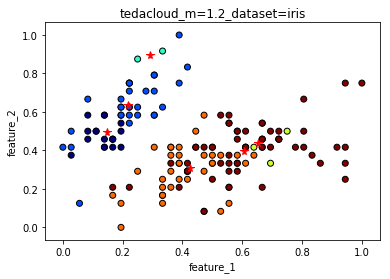

Nº clouds encontradas: 6




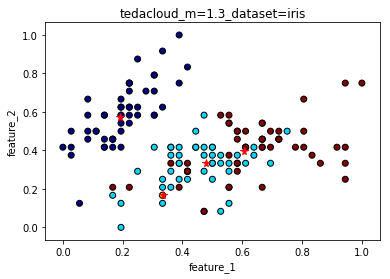

Nº clouds encontradas: 4




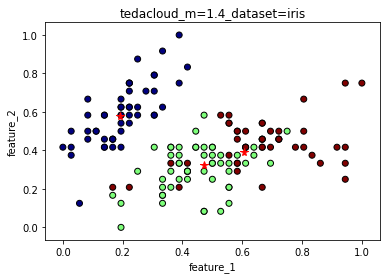

Nº clouds encontradas: 3




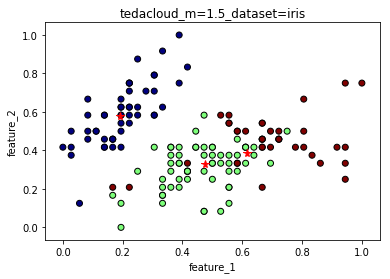

Nº clouds encontradas: 3




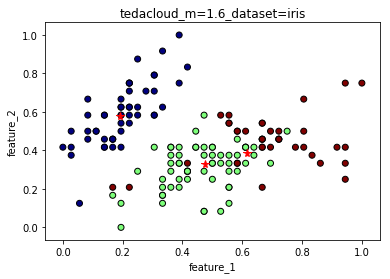

Nº clouds encontradas: 3




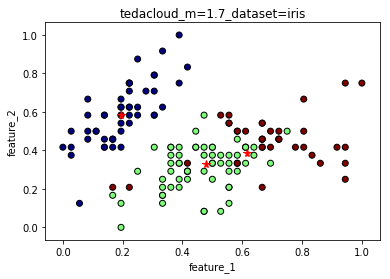

Nº clouds encontradas: 3




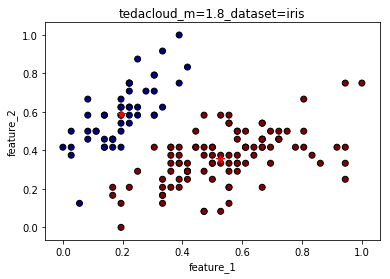

Nº clouds encontradas: 2




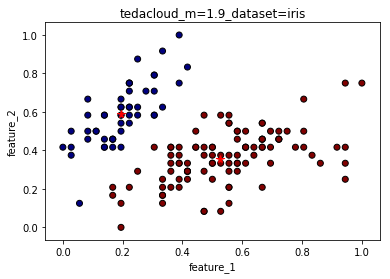

Nº clouds encontradas: 2




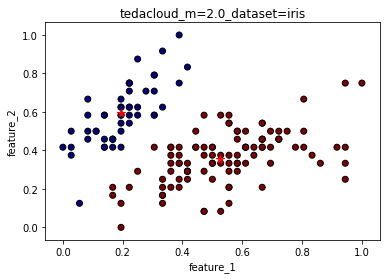

Nº clouds encontradas: 2




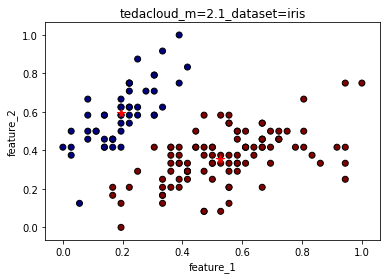

Nº clouds encontradas: 2




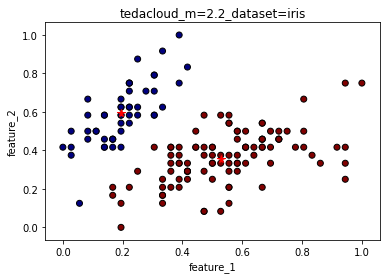

Nº clouds encontradas: 2




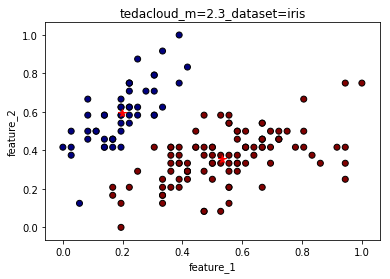

Nº clouds encontradas: 2




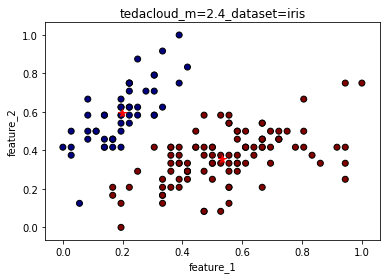

Nº clouds encontradas: 2




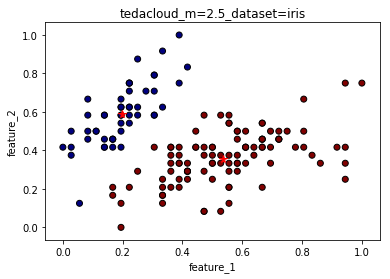

Nº clouds encontradas: 2




In [3]:
# 1 - create a dic to store all datasets and label solutions
dic_solution = {}

# 2 - list of dataset names for analysis
list_dataset = ['iris']

# 3 - list of m's (qtd of standart deviation)
#list_sd = [1.35, 1.39, 1.4, 1.45, 1.5]
list_sd = np.arange(1.2,2.6,0.1)

for name_dataset in list_dataset: 
    
    start_time = time.time()
    
    # 4 - read and normalize the dataset
    df = normalize(create_dataset(name_dataset))
    
    # 5 - Shuffling dataset (if needed)
    # df.sample(frac=1) #shuffle dataframe
    # df = df.sample(frac=1).reset_index(drop=True) #shuffle dataframe and reset index
    
    # 6 - get all the key features
    features = np.sort([feature for feature in df.keys() if 'feature' in feature])
    
    # 7 - create tedacloud class for dataset
    tedacloud = Tedacloud(df)
    
    for sd in list_sd:    
        
        name='tedacloud'+'_'+'m='+str(round(sd,2))+'_'+'dataset='+name_dataset
        
        # 8 - fit the dataset using specific m
        tedacloud.Fit(sd)
        
        # 9 - store the solution in a dictionary
        dic_solution[name] = {'dataset': df[features], 'label_round_truth': df['Label'], 'label_solution': tedacloud.label_solution_adjusted}
        
        # 10 - plot results
        fig = plt.figure()
        plt.scatter(df['feature_1'].values, df['feature_2'].values, c=dic_solution[name]['label_solution'], cmap='jet', edgecolor='k')
        for key in tedacloud.clus_teda.keys():
            plt.plot(tedacloud.clus_teda[key]['curr_mean'][0], tedacloud.clus_teda[key]['curr_mean'][1], color='red', marker='*', markersize=8)
            plt.title(name)
            plt.xlabel('feature_1')
            plt.ylabel('feature_2')
            #print('Clouds centers:',round(tedacloud.clus_teda[key]['curr_mean'][0],3), round(tedacloud.clus_teda[key]['curr_mean'][1],3))
        plt.show()
        
        # 11 - save figure
        fig.savefig('output/realdatasets/'+name+'.png')

        print('Nº clouds encontradas: {0}'.format(tedacloud.nclust))
        #print('Processing time: {0}'.format(time.strftime("%H:%M:%S", time.gmtime(time.time()-start_time))))
        print('\n')

##### incremental K-Means

MiniBatch Kmeans - Batch Size = 1


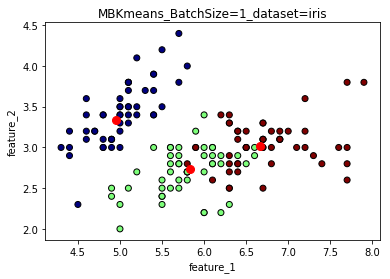

Nº clusters encontrados: 3



MiniBatch Kmeans - Batch Size = 10


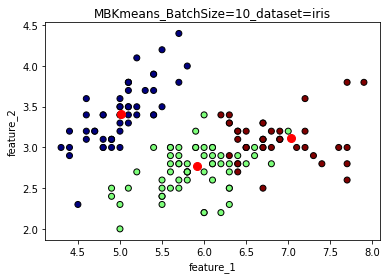

Nº clusters encontrados: 3



MiniBatch Kmeans - Batch Size = 50


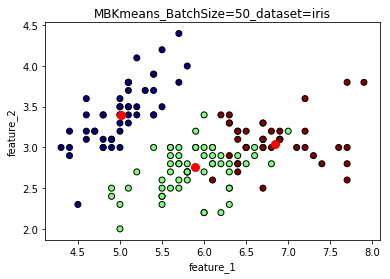

Nº clusters encontrados: 3



MiniBatch Kmeans - Batch Size = 100


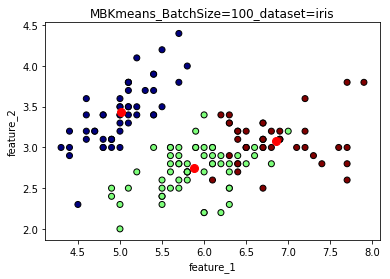

Nº clusters encontrados: 3





In [4]:
# 1 - Incremental K-means
BatchSize_list = [1,10,50,100]

for name_dataset in list_dataset:
    
    # 2 - load dataset
    df = create_dataset(name_dataset)
    features = np.sort([feature for feature in df.keys() if 'feature' in feature])

    for batch_size in BatchSize_list: 
        print('MiniBatch Kmeans - Batch Size = {}'.format(batch_size))
        
        # 3 - fit model
        #mbk = MiniBatchKMeans(init='k-means++', n_clusters=len(set(df['Label'])), batch_size=batch_size,n_init=10, max_no_improvement=10, verbose=0)
        mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=batch_size,n_init=10, max_no_improvement=10, verbose=0)
        mbk.fit(df[features])
        mbk.cluster = mbk.cluster_centers_

        name = 'MBKmeans'+"_"+"BatchSize="+str(batch_size)+"_"+'dataset='+name_dataset
        
        dic_solution[name] = {'dataset': df[features], 'label_round_truth': df['Label'], 'label_solution': gen_Label_Solution(mbk.cluster_centers_, mbk.labels_) + 1}
        
        # 4 - plot results
        figure = plt.figure()
        plt.scatter(df['feature_1'].values, df['feature_2'].values, c=dic_solution[name]['label_solution'], cmap='jet', edgecolor='k')
        for center in mbk.cluster_centers_:
            plt.plot(center[0], center[1], color='red', marker='o', markersize=8)
            plt.title(name)
            plt.xlabel('feature_1')
            plt.ylabel('feature_2')
        plt.show()
        
        # 5 - save figure
        fig.savefig('output/realdatasets/'+name+'.png')

        print('Nº clusters encontrados: {0}'.format(len(mbk.cluster_centers_)))
        print('\n\n')

##### Performance evaluation

In [5]:
colums_tedacloud = [column for column in dic_solution.keys() if 'tedacloud' in column]
colums_mbkmeans = [column for column in dic_solution.keys() if 'MBKmeans' in column]

for column in colums_tedacloud:
    dic_solution[column]['silhouette_score'] = 0
    dic_solution[column]['recall_score'] = 0
    dic_solution[column]['precision_recall_fscore_support'] = 0
    
    dic_solution[column]['silhouette_score'] = round(metrics.silhouette_score(dic_solution[column]['dataset'], dic_solution[column]['label_solution'], metric='sqeuclidean'),3)
    dic_solution[column]['recall_score'] = round(metrics.recall_score(dic_solution[column]['label_round_truth'], dic_solution[column]['label_solution'], average='micro'),3)
    dic_solution[column]['precision_recall_fscore_support'] = metrics.precision_recall_fscore_support(dic_solution[column]['label_round_truth'], dic_solution[column]['label_solution'], average='micro')

for column in colums_mbkmeans:
    dic_solution[column]['silhouette_score'] = 0
    dic_solution[column]['recall_score'] = 0
    dic_solution[column]['precision_recall_fscore_support'] = 0
    
    dic_solution[column]['silhouette_score'] = round(metrics.silhouette_score(dic_solution[column]['dataset'], dic_solution[column]['label_solution'], metric='sqeuclidean'),3)
    dic_solution[column]['recall_score'] = round(metrics.recall_score(dic_solution[column]['label_round_truth'], dic_solution[column]['label_solution'], average='micro'),3)
    dic_solution[column]['precision_recall_fscore_support'] = metrics.precision_recall_fscore_support(dic_solution[column]['label_round_truth'], dic_solution[column]['label_solution'], average='micro')

In [6]:
import pprint
for test in dic_solution.keys():
    print(test)
    for key in dic_solution[test].keys():
        if ('dataset' not in key) and ('label' not in key):
            print('---> ',key, dic_solution[test][key])
    print('\n')

tedacloud_m=1.2_dataset=iris
--->  silhouette_score 0.13
--->  recall_score 0.133
--->  precision_recall_fscore_support (0.13333333333333333, 0.13333333333333333, 0.13333333333333333, None)


tedacloud_m=1.3_dataset=iris
--->  silhouette_score 0.4
--->  recall_score 0.647
--->  precision_recall_fscore_support (0.6466666666666666, 0.6466666666666666, 0.6466666666666666, None)


tedacloud_m=1.4_dataset=iris
--->  silhouette_score 0.648
--->  recall_score 0.92
--->  precision_recall_fscore_support (0.92, 0.92, 0.92, None)


tedacloud_m=1.5_dataset=iris
--->  silhouette_score 0.655
--->  recall_score 0.873
--->  precision_recall_fscore_support (0.8733333333333333, 0.8733333333333333, 0.8733333333333333, None)


tedacloud_m=1.6_dataset=iris
--->  silhouette_score 0.655
--->  recall_score 0.873
--->  precision_recall_fscore_support (0.8733333333333333, 0.8733333333333333, 0.8733333333333333, None)


tedacloud_m=1.7_dataset=iris
--->  silhouette_score 0.651
--->  recall_score 0.867
--->  prec

Performance evaluation for tedacloud and incremental k-means

In [7]:
ntests_teda = 0
ntests_inc_kmeans = 0
for key in dic_solution.keys():
    if 'tedacloud' in key:
        ntests_teda += 1
    if 'MBKmeans' in key:
        ntests_inc_kmeans += 1

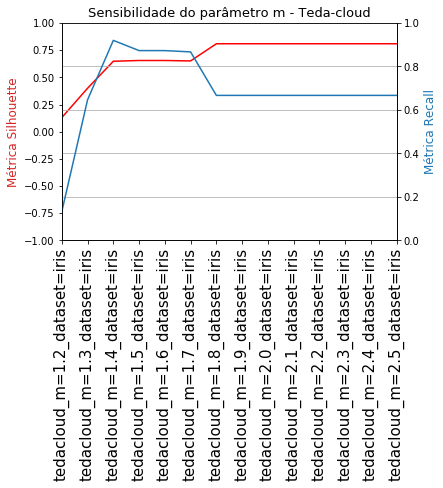

In [8]:
# Tedacloud
from pylab import rcParams

silhouette_tedacloud = []
recall_tedacloud = []
for key in colums_tedacloud:
    silhouette_tedacloud.append(dic_solution[key]['silhouette_score'])
    recall_tedacloud.append(dic_solution[key]['recall_score'])

fig = plt.figure()
color = 'tab:red'

ax1 = fig.add_subplot(111)
ax1.plot(np.arange(0,len(silhouette_tedacloud)), silhouette_tedacloud, label='silhouette score', color='red')
plt.xticks(np.arange(0,len(silhouette_tedacloud)), colums_tedacloud, rotation='vertical', fontsize=15)
plt.title('Sensibilidade do parâmetro m - Teda-cloud', fontsize=13)
ax1.set_ylabel('Métrica Silhouette', color=color, fontsize=12)
ax1.axis([0,ntests_teda-1,-1,1])

color = 'tab:blue'

ax2 = ax1.twinx() 
ax2.plot(np.arange(0,len(recall_tedacloud)), recall_tedacloud, label='recall score')
ax2.set_ylabel('Métrica Recall', color=color, fontsize=12)
ax2.axis([0,ntests_teda-1,0,1])
plt.grid()
plt.show()
fig.savefig('output/realdatasets/Sensibilidade do parâmetro m - Teda-cloud'+'.png')

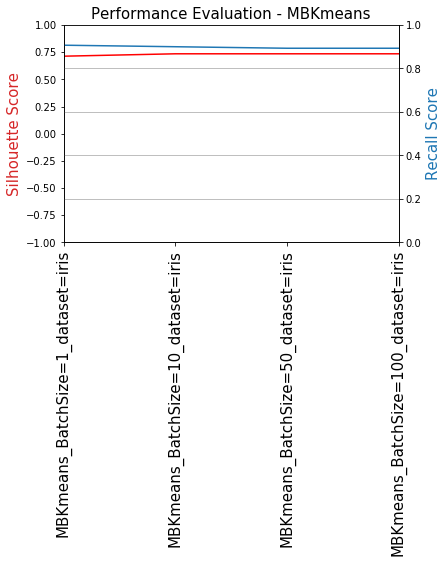

In [9]:
# incremental k-means

silhouette_MBKmeans = []
recall_MBKmeans = []
for key in colums_mbkmeans:
    silhouette_MBKmeans.append(dic_solution[key]['silhouette_score'])
    recall_MBKmeans.append(dic_solution[key]['recall_score'])

fig = plt.figure()
color = 'tab:red'

ax1 = fig.add_subplot(111)
ax1.plot(np.arange(0,len(silhouette_MBKmeans)), silhouette_MBKmeans, label='silhouette score', color='red')
plt.xticks(np.arange(0,len(silhouette_MBKmeans)),colums_mbkmeans, rotation='vertical', fontsize=15)
plt.title('Performance Evaluation - MBKmeans', fontsize=15)
ax1.set_ylabel('Silhouette Score', color=color, fontsize=15)
ax1.axis([0,ntests_inc_kmeans-1,-1,1])

color = 'tab:blue'

ax2 = ax1.twinx() 
ax2.plot(np.arange(0,len(recall_MBKmeans)), recall_MBKmeans, label='recall score')
ax2.set_ylabel('Recall Score', color=color, fontsize=15)
ax2.axis([0,ntests_inc_kmeans-1,0,1])
plt.grid()
plt.show()

##### Graphical explanation of results

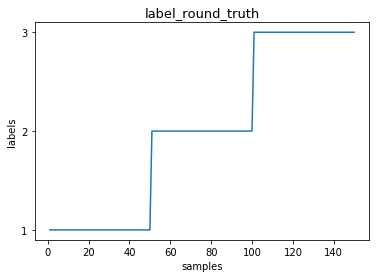

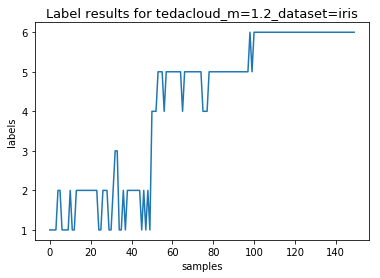

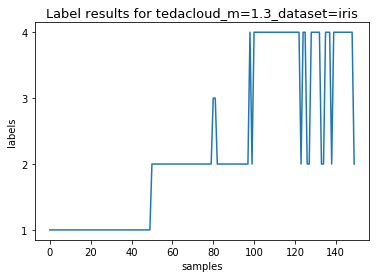

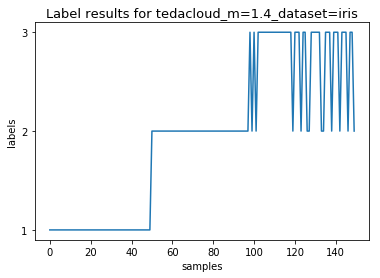

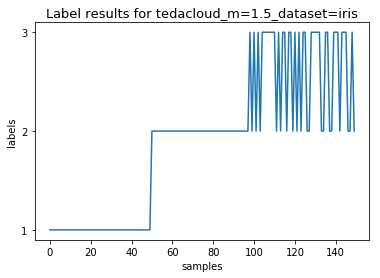

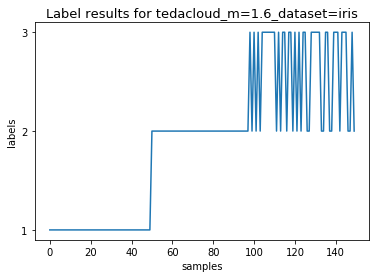

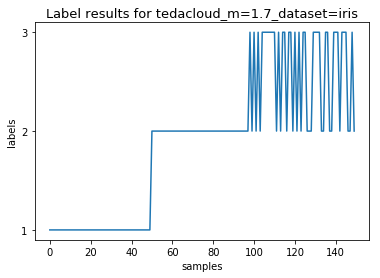

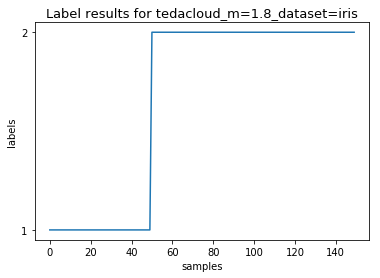

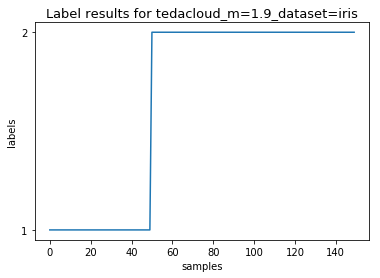

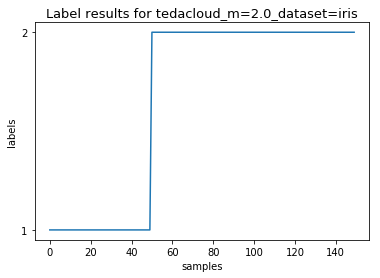

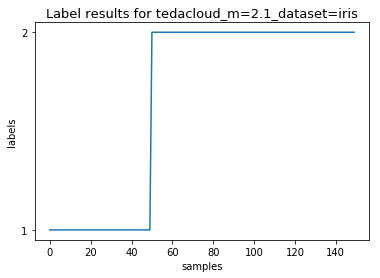

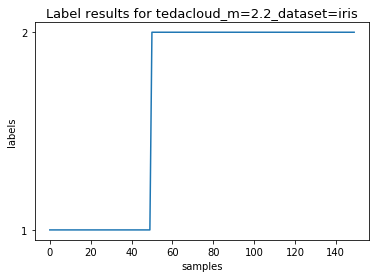

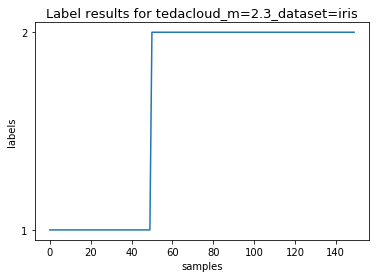

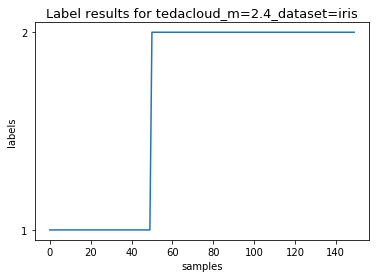

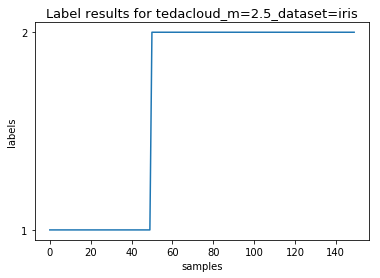

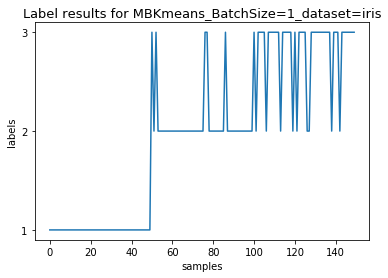

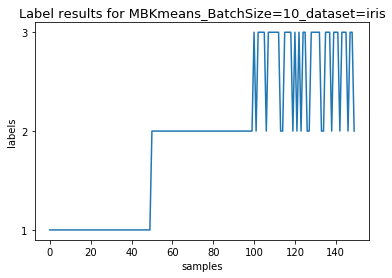

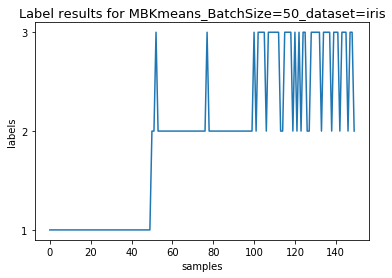

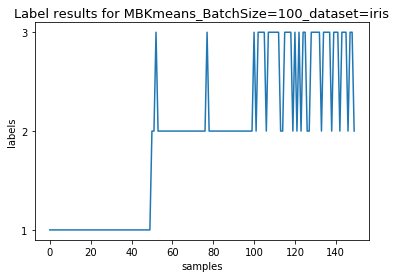

In [10]:
fig = plt.figure()
plt.plot(dic_solution['tedacloud_m=1.4_dataset=iris']['label_round_truth'])
plt.title('label_round_truth',size=13)
plt.yticks(np.arange(1, 4, 1))
plt.ylabel('labels')
plt.xlabel('samples')
fig.savefig('output/results/label_truth_iris.png')
plt.show()

for solution in dic_solution.keys():
    fig = plt.figure()
    plt.plot(dic_solution[solution]['label_solution'])
    plt.title("Label results for "+solution, size=13)
    nlab = len(list(set(dic_solution[solution]['label_solution'])))
    plt.yticks(np.arange(1, nlab+1, 1))
    plt.ylabel('labels')
    plt.xlabel('samples')
    fig.savefig('output/results/'+solution+'.png')
    plt.show()

#### ADL (Activities Daily Living)

In [27]:
name_dataset = 'adl'
d = create_dataset(name_dataset)
d.head()

,x,y,z,Label,feature_1,feature_2,feature_3,bodymotion_1,bodymotion_2,bodymotion_3
index,,,,,,,,,,
1,22,49,35,1,16.0,45.0,32.0,-6.0,-4.0,-3.0
2,22,49,35,1,18.0,47.0,33.0,-4.0,-2.0,-2.0
3,22,52,35,1,18.0,47.0,33.0,-4.0,-5.0,-2.0
4,22,52,35,1,18.0,47.0,33.0,-4.0,-5.0,-2.0
5,21,52,34,1,19.0,47.0,33.0,-2.0,-5.0,-1.0


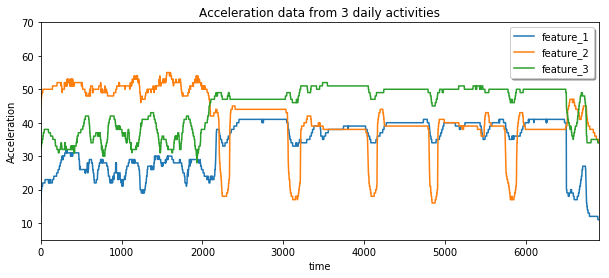

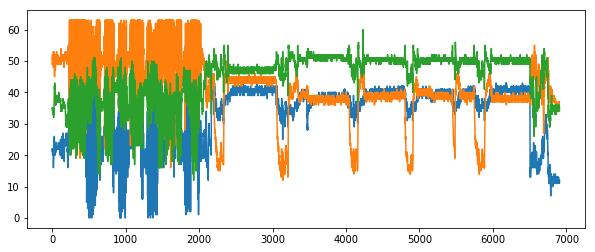

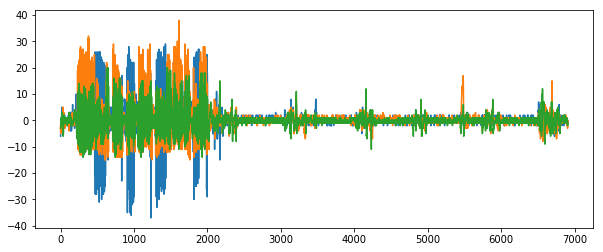

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4

plt.plot(d['feature_1'].values, label='feature_1')
plt.plot(d['feature_2'].values, label='feature_2')
plt.plot(d['feature_3'].values, label='feature_3')
plt.ylabel('Acceleration')
plt.xlabel('time')
plt.title('Acceleration data from 3 daily activities')
plt.legend(loc='upper right', shadow=True)
plt.axis((0,len(d['feature_1'].values),5,70))
 
plt.show()

plt.plot(d['x'].values)
plt.plot(d['y'].values)
plt.plot(d['z'].values)
plt.show()

plt.plot(d['bodymotion_1'].values)
plt.plot(d['bodymotion_2'].values)
plt.plot(d['bodymotion_3'].values)
plt.show()

##### tedacloud

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4

In [30]:
list_dataset = ['adl']
for name_dataset in list_dataset:
    df = normalize(create_dataset(name_dataset))
    # 5 - take mean every xT samples
    nT = '64T'
    length = len(df['Label'].values)
    idx = pd.date_range(start='2018', periods=length, freq='T')
    df.set_index(idx, inplace=True)
    df = df.resample(nT).mean()
    df['Label'] = df['Label'].astype(int)
df.head()

,x,y,z,Label,feature_1,feature_2,feature_3,bodymotion_1,bodymotion_2,bodymotion_3
2018-01-01 00:00:00,22.015625,49.875000,36.953125,1,0.348958,0.853365,0.335286,-0.546875,-0.593750,-0.906250
2018-01-01 01:04:00,22.406250,50.000000,37.156250,1,0.389063,0.871795,0.389974,0.265625,0.000000,0.203125
2018-01-01 02:08:00,23.000000,50.921875,34.859375,1,0.408854,0.891026,0.288411,0.265625,-0.171875,0.062500
2018-01-01 03:12:00,25.953125,50.468750,31.718750,1,0.512500,0.917869,0.177734,0.421875,1.328125,0.546875
2018-01-01 04:16:00,30.781250,49.656250,33.156250,1,0.639062,0.888622,0.175130,-0.609375,1.000000,-0.953125


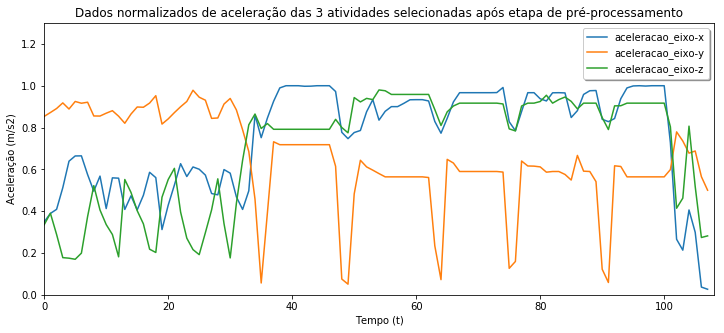

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

plt.plot(df['feature_1'].values, label='aceleracao_eixo-x')
plt.plot(df['feature_2'].values, label='aceleracao_eixo-y')
plt.plot(df['feature_3'].values, label='aceleracao_eixo-z')
plt.ylabel('Aceleração (m/s2)')
plt.xlabel('Tempo (t)')
plt.title('Dados normalizados de aceleração das 3 atividades selecionadas após etapa de pré-processamento')
plt.legend(loc='upper right', shadow=True)
plt.axis((0,len(df['feature_1'].values),0,1.3))
plt.show()

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 7, 5

C:\Users\pedro.h.tavares\Documents\GitHub\Anomaly-detection\scripts\tedacloud.py:54: RuntimeWarning: invalid value encountered in double_scalars
  recursive_ecc = (1/k) + (np.sum((recursive_mean - curr_observation) * (recursive_mean - curr_observation))/(k * recursive_var))


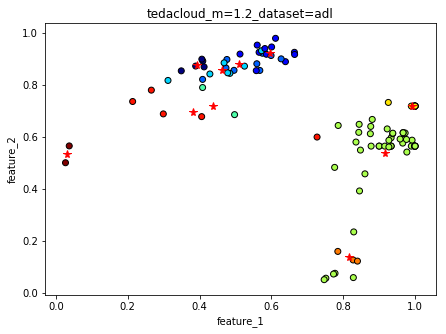

Nº clouds encontradas: 10




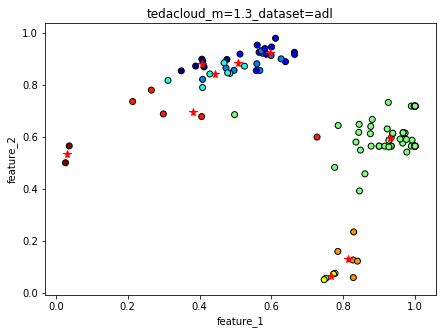

Nº clouds encontradas: 9




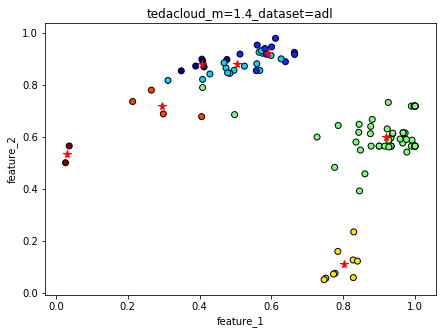

Nº clouds encontradas: 7




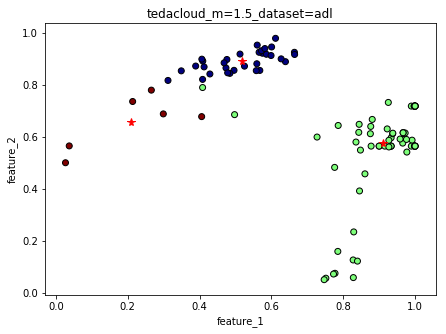

Nº clouds encontradas: 3




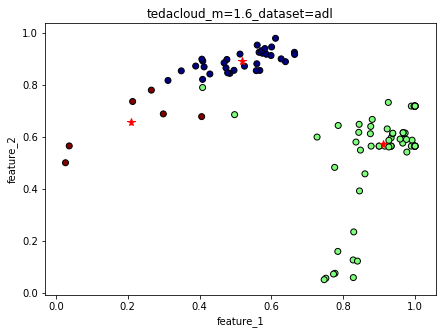

Nº clouds encontradas: 3




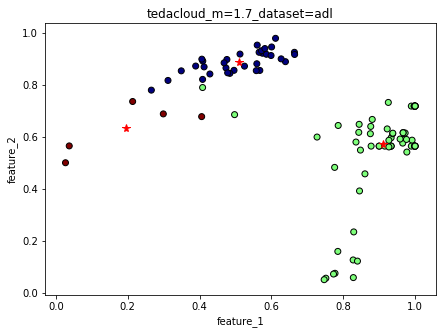

Nº clouds encontradas: 3




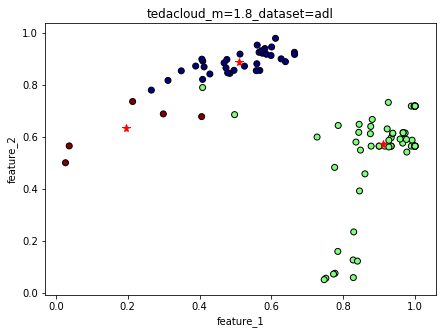

Nº clouds encontradas: 3




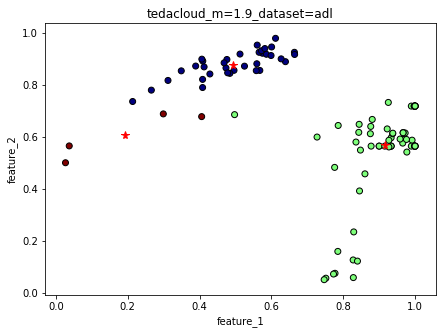

Nº clouds encontradas: 3




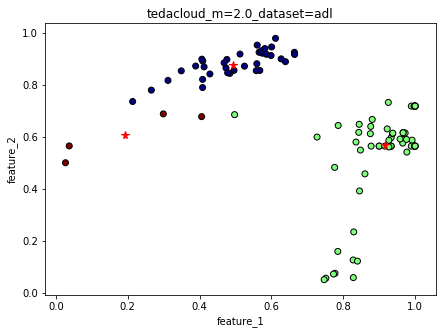

Nº clouds encontradas: 3




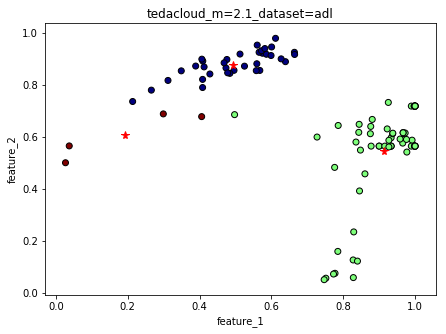

Nº clouds encontradas: 3




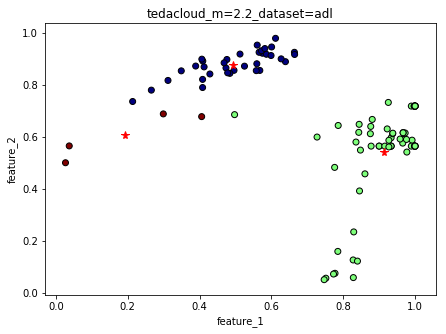

Nº clouds encontradas: 3




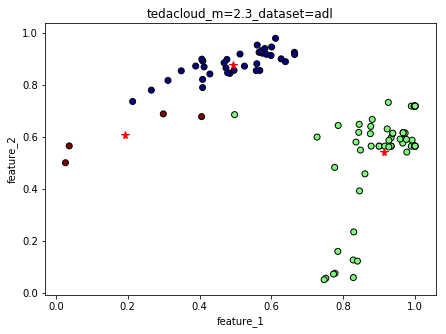

Nº clouds encontradas: 3




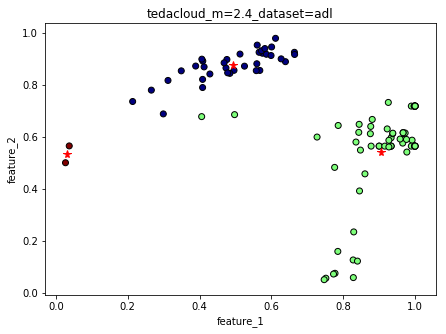

Nº clouds encontradas: 3




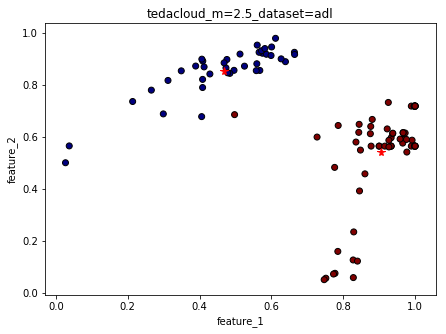

Nº clouds encontradas: 2




In [33]:
# 1 - create a dic to store all datasets and label solutions
dic_solution = {}

# 2 - list of dataset names for analysis
list_dataset = ['adl']

# 3 - list of m's (qtd of standart deviation)
#list_sd = [1.48, 1.485, 1.49, 1.495, 1.5]
#list_sd = [1.35, 1.39, 1.4, 1.45, 1.5]
list_sd = np.arange(1.2,2.6,0.1)

for name_dataset in list_dataset: 
    
    start_time = time.time()
    
    # 4 - read and normalize the dataset
    df = normalize(create_dataset(name_dataset))
    
    # Shuffling dataset (if needed)
    # df.sample(frac=1) #shuffle dataframe
    # df = df.sample(frac=1).reset_index(drop=True) #shuffle dataframe and reset index
    
    # 5 - take mean every xT samples
    nT = '64T'
    length = len(df['Label'].values)
    idx = pd.date_range(start='2018', periods=length, freq='T')
    df.set_index(idx, inplace=True)
    df = df.resample(nT).mean()
    df['Label'] = df['Label'].astype(int)
    
    df['index'] = np.arange(1,len(df['Label'].values)+1,1) 
    df['index'] = df['index'].astype(int)
    df.set_index('index', inplace=True)
    
    # 6 - get all the key features
    features = np.sort([feature for feature in df.keys() if 'feature' in feature])
    
    # 7 - create tedacloud class for dataset
    tedacloud = Tedacloud(df)
    
    for sd in list_sd:    
        
        name='tedacloud'+'_'+'m='+str(round(sd,3))+'_'+'dataset='+name_dataset
        
        # 8 - fit the dataset using specific m
        tedacloud.Fit(sd)
        
        # 9 - store the solution in a dictionary
        dic_solution[name] = {'dataset': df[features], 'label_round_truth': df['Label'], 'label_solution': tedacloud.label_solution_adjusted}
        
        # 10 - plot results
        fig = plt.figure()
        plt.scatter(df['feature_1'].values, df['feature_2'].values, c=dic_solution[name]['label_solution'], cmap='jet', edgecolor='k')
        for key in tedacloud.clus_teda.keys():
            plt.plot(tedacloud.clus_teda[key]['curr_mean'][0], tedacloud.clus_teda[key]['curr_mean'][1], color='red', marker='*', markersize=8)
            plt.title(name)
            plt.xlabel('feature_1')
            plt.ylabel('feature_2')
            #print('Clouds centers:',round(tedacloud.clus_teda[key]['curr_mean'][0],3), round(tedacloud.clus_teda[key]['curr_mean'][1],3))
        plt.show()
        
        # 11 - save figure
        fig.savefig('output/realdatasets/'+name+'.png')

        print('Nº clouds encontradas: {0}'.format(tedacloud.nclust))
        #print('Processing time: {0}'.format(time.strftime("%H:%M:%S", time.gmtime(time.time()-start_time))))
        print('\n')

##### incremental K-Means

MiniBatch Kmeans - Batch Size = 1


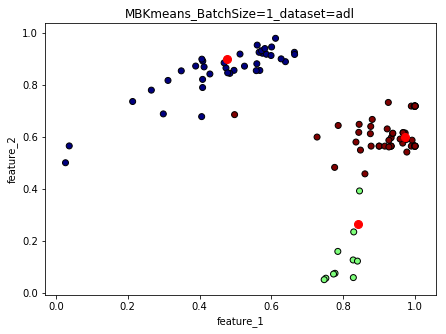

Nº clusters encontrados: 3



MiniBatch Kmeans - Batch Size = 30


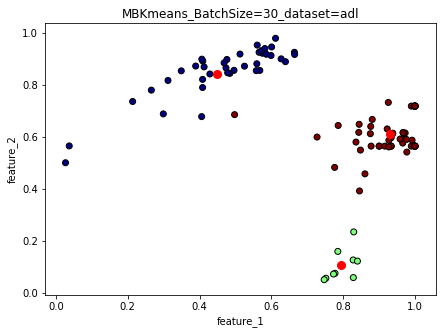

Nº clusters encontrados: 3



MiniBatch Kmeans - Batch Size = 50


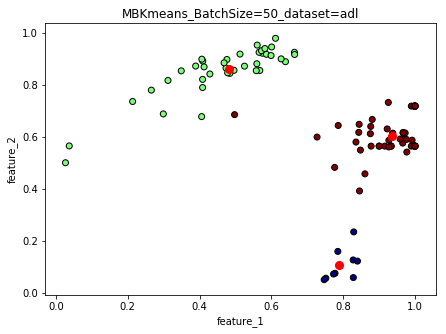

Nº clusters encontrados: 3



MiniBatch Kmeans - Batch Size = 70


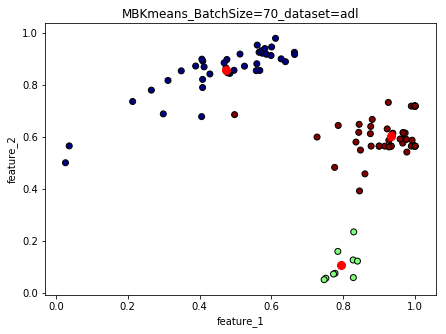

Nº clusters encontrados: 3





In [34]:
# 1 - Incremental K-means
BatchSize_list = [1, 30, 50, 70]

for name_dataset in list_dataset:
    
    # 2 - load dataset
    #df = create_dataset(name_dataset)
    df = normalize(create_dataset(name_dataset))
    
    # 5 - take mean every xT samples
    nT = '64T'
    length = len(df['Label'].values)
    idx = pd.date_range(start='2018', periods=length, freq='T')
    df.set_index(idx, inplace=True)
    df = df.resample(nT).mean()
    df['Label'] = df['Label'].astype(int)
    
    df['index'] = np.arange(1,len(df['Label'].values)+1,1) 
    df['index'] = df['index'].astype(int)
    df.set_index('index', inplace=True)
    
    features = np.sort([feature for feature in df.keys() if 'feature' in feature])

    for batch_size in BatchSize_list: 
        print('MiniBatch Kmeans - Batch Size = {}'.format(batch_size))
        
        # 3 - fit model
        #mbk = MiniBatchKMeans(init='k-means++', n_clusters=len(set(df['Label'])), batch_size=batch_size,n_init=10, max_no_improvement=10, verbose=0)
        mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=batch_size,n_init=10, max_no_improvement=10, verbose=0)
        mbk.fit(df[features])
        mbk.cluster = mbk.cluster_centers_

        name = 'MBKmeans'+"_"+"BatchSize="+str(batch_size)+"_"+'dataset='+name_dataset
        
        dic_solution[name] = {'dataset': df[features], 'label_round_truth': df['Label'], 'label_solution': gen_Label_Solution(mbk.cluster_centers_, mbk.labels_) + 1}
        
        # 4 - plot results
        figure = plt.figure()
        plt.scatter(df['feature_1'].values, df['feature_2'].values, c=dic_solution[name]['label_solution'], cmap='jet', edgecolor='k')
        for center in mbk.cluster_centers_:
            plt.plot(center[0], center[1], color='red', marker='o', markersize=8)
            plt.title(name)
            plt.xlabel('feature_1')
            plt.ylabel('feature_2')
        plt.show()
        
        # 5 - save figure
        fig.savefig('output/realdatasets/'+name+'.png')

        print('Nº clusters encontrados: {0}'.format(len(mbk.cluster_centers_)))
        print('\n\n')

In [35]:
dic_solution.keys()

dict_keys(['tedacloud_m=1.2_dataset=adl', 'tedacloud_m=1.3_dataset=adl', 'tedacloud_m=1.4_dataset=adl', 'tedacloud_m=1.5_dataset=adl', 'tedacloud_m=1.6_dataset=adl', 'tedacloud_m=1.7_dataset=adl', 'tedacloud_m=1.8_dataset=adl', 'tedacloud_m=1.9_dataset=adl', 'tedacloud_m=2.0_dataset=adl', 'tedacloud_m=2.1_dataset=adl', 'tedacloud_m=2.2_dataset=adl', 'tedacloud_m=2.3_dataset=adl', 'tedacloud_m=2.4_dataset=adl', 'tedacloud_m=2.5_dataset=adl', 'MBKmeans_BatchSize=1_dataset=adl', 'MBKmeans_BatchSize=30_dataset=adl', 'MBKmeans_BatchSize=50_dataset=adl', 'MBKmeans_BatchSize=70_dataset=adl'])

In [36]:
#dic_solution['MBKmeans_BatchSize=100_dataset=adl']['dataset']

##### Performance evaluation

In [37]:
colums_tedacloud = [column for column in dic_solution.keys() if 'tedacloud' in column]
colums_mbkmeans = [column for column in dic_solution.keys() if 'MBKmeans' in column]

for column in colums_tedacloud:
    dic_solution[column]['silhouette_score'] = 0
    dic_solution[column]['recall_score'] = 0
    dic_solution[column]['precision_recall_fscore_support'] = 0
    
    dic_solution[column]['silhouette_score'] = round(metrics.silhouette_score(dic_solution[column]['dataset'], dic_solution[column]['label_solution'], metric='sqeuclidean'),3)
    dic_solution[column]['recall_score'] = round(metrics.recall_score(dic_solution[column]['label_round_truth'], dic_solution[column]['label_solution'], average='micro'),3)
    dic_solution[column]['precision_recall_fscore_support'] = metrics.precision_recall_fscore_support(dic_solution[column]['label_round_truth'], dic_solution[column]['label_solution'], average='micro')

for column in colums_mbkmeans:
    dic_solution[column]['silhouette_score'] = 0
    dic_solution[column]['recall_score'] = 0
    dic_solution[column]['precision_recall_fscore_support'] = 0
    
    dic_solution[column]['silhouette_score'] = round(metrics.silhouette_score(dic_solution[column]['dataset'], dic_solution[column]['label_solution'], metric='sqeuclidean'),3)
    dic_solution[column]['recall_score'] = round(metrics.recall_score(dic_solution[column]['label_round_truth'], dic_solution[column]['label_solution'], average='micro'),3)
    dic_solution[column]['precision_recall_fscore_support'] = metrics.precision_recall_fscore_support(dic_solution[column]['label_round_truth'], dic_solution[column]['label_solution'], average='micro')

# Performance evaluation for tedacloud and incremental k-means

ntests_teda = 0
ntests_inc_kmeans = 0
for key in dic_solution.keys():
    if 'tedacloud' in key:
        ntests_teda += 1
    if 'MBKmeans' in key:
        ntests_inc_kmeans += 1

In [38]:
for test in dic_solution.keys():
    print(test)
    for key in dic_solution[test].keys():
        if ('dataset' not in key) and ('label' not in key):
            print('---> ',key, dic_solution[test][key])
    print('\n')

tedacloud_m=1.2_dataset=adl
--->  silhouette_score 0.157
--->  recall_score 0.046
--->  precision_recall_fscore_support (0.046296296296296294, 0.046296296296296294, 0.046296296296296294, None)


tedacloud_m=1.3_dataset=adl
--->  silhouette_score 0.593
--->  recall_score 0.056
--->  precision_recall_fscore_support (0.05555555555555555, 0.05555555555555555, 0.05555555555555555, None)


tedacloud_m=1.4_dataset=adl
--->  silhouette_score 0.647
--->  recall_score 0.056
--->  precision_recall_fscore_support (0.05555555555555555, 0.05555555555555555, 0.05555555555555555, None)


tedacloud_m=1.5_dataset=adl
--->  silhouette_score 0.773
--->  recall_score 0.981
--->  precision_recall_fscore_support (0.9814814814814815, 0.9814814814814815, 0.9814814814814815, None)


tedacloud_m=1.6_dataset=adl
--->  silhouette_score 0.773
--->  recall_score 0.981
--->  precision_recall_fscore_support (0.9814814814814815, 0.9814814814814815, 0.9814814814814815, None)


tedacloud_m=1.7_dataset=adl
--->  silhouett

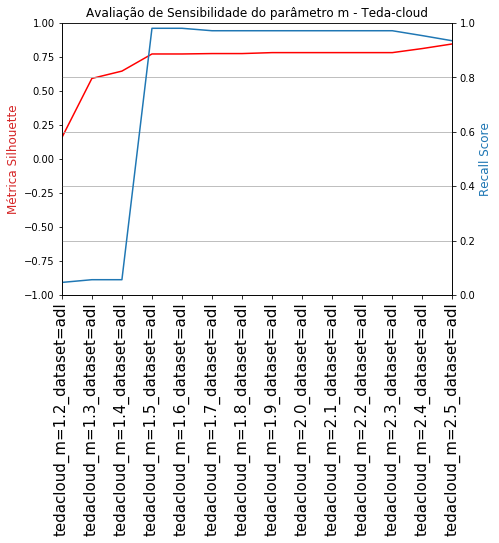

In [39]:
# Tedacloud
silhouette_tedacloud = []
recall_tedacloud = []
for key in colums_tedacloud:
    silhouette_tedacloud.append(dic_solution[key]['silhouette_score'])
    recall_tedacloud.append(dic_solution[key]['recall_score'])

fig = plt.figure()
color = 'tab:red'

ax1 = fig.add_subplot(111)
ax1.plot(np.arange(0,len(silhouette_tedacloud)), silhouette_tedacloud, label='silhouette score', color='red')
plt.xticks(np.arange(0,len(silhouette_tedacloud)), colums_tedacloud, rotation=90, fontsize=15)
plt.title('Avaliação de Sensibilidade do parâmetro m - Teda-cloud', fontsize=12)
ax1.set_ylabel('Métrica Silhouette', color=color, fontsize=12)
ax1.axis([0,ntests_teda-1,-1,1])

color = 'tab:blue'

ax2 = ax1.twinx() 
ax2.plot(np.arange(0,len(recall_tedacloud)), recall_tedacloud, label='recall score')
ax2.set_ylabel('Recall Score', color=color, fontsize=12)
ax2.axis([0,ntests_teda-1,0,1])
plt.grid()
plt.show()

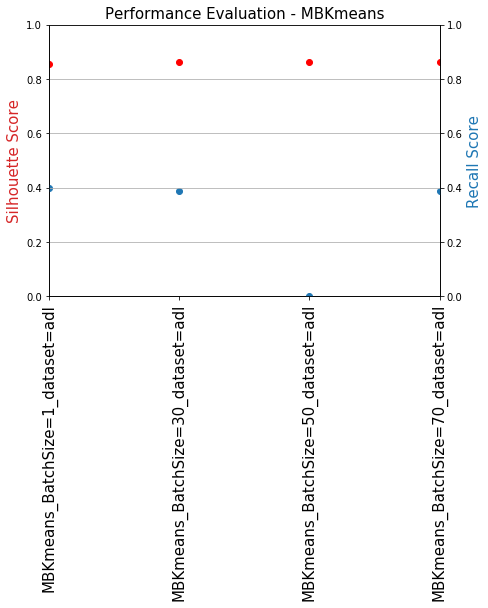

In [40]:
# incremental k-means
silhouette_MBKmeans = []
recall_MBKmeans = []
for key in colums_mbkmeans:
    silhouette_MBKmeans.append(dic_solution[key]['silhouette_score'])
    recall_MBKmeans.append(dic_solution[key]['recall_score'])

fig = plt.figure()
color = 'tab:red'

ax1 = fig.add_subplot(111)
ax1.scatter(np.arange(0,len(silhouette_MBKmeans)), silhouette_MBKmeans, label='silhouette score', color='red')
plt.xticks(np.arange(0,len(silhouette_MBKmeans)),colums_mbkmeans, rotation='vertical', fontsize=15)
plt.title('Performance Evaluation - MBKmeans', fontsize=15)
ax1.set_ylabel('Silhouette Score', color=color, fontsize=15)
ax1.axis([0,ntests_inc_kmeans-1,0,1])

color = 'tab:blue'

ax2 = ax1.twinx() 
ax2.scatter(np.arange(0,len(recall_MBKmeans)), recall_MBKmeans, label='recall score')
ax2.set_ylabel('Recall Score', color=color, fontsize=15)
ax2.axis([0,ntests_inc_kmeans-1,0,1])
plt.grid()
plt.show()

##### Graphical explanation of results

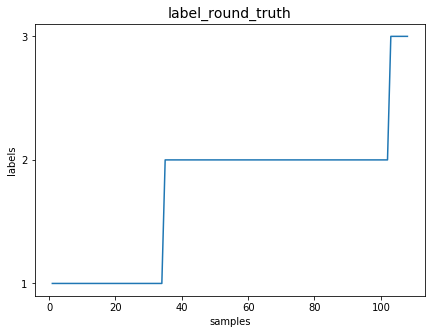

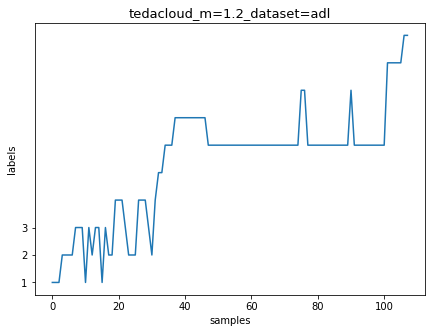

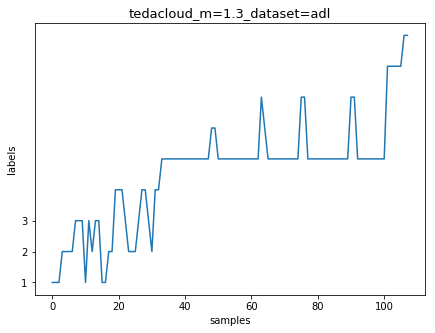

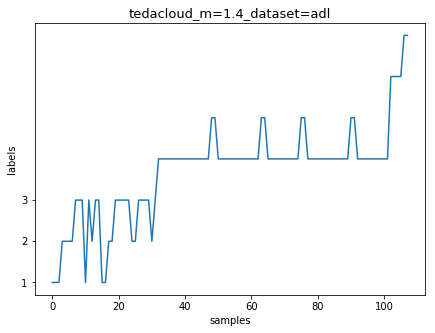

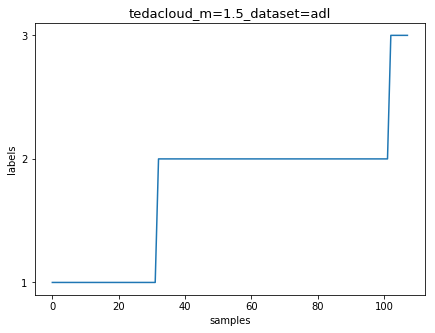

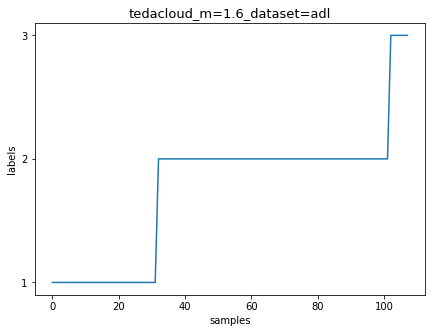

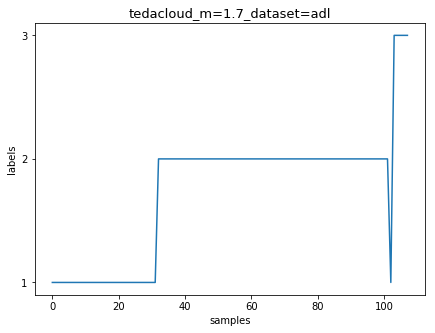

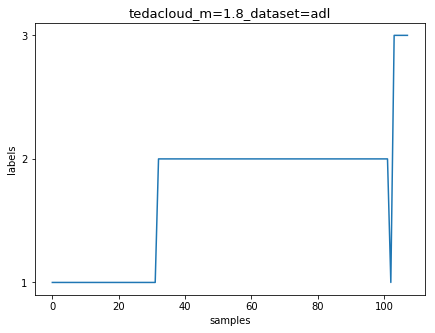

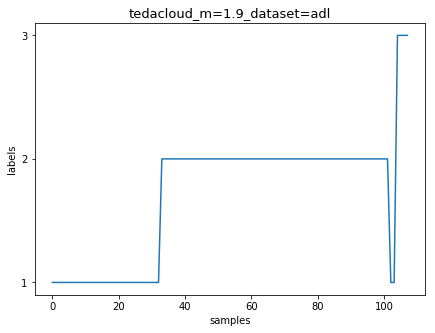

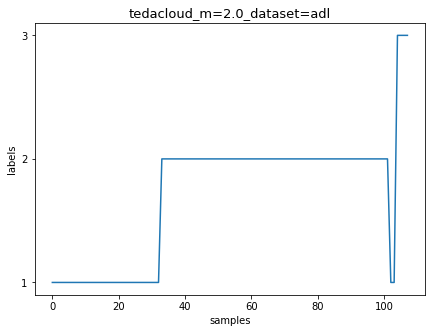

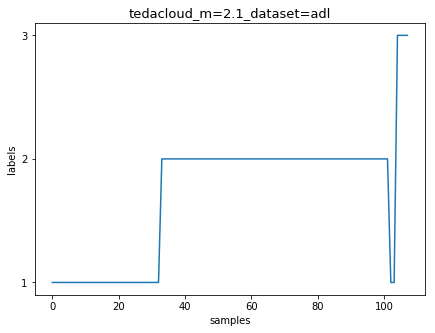

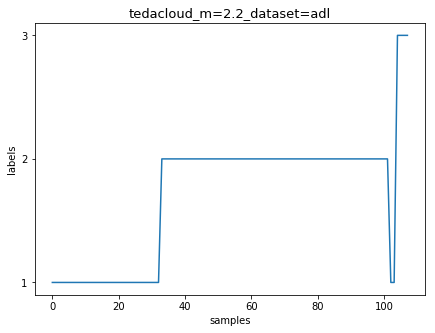

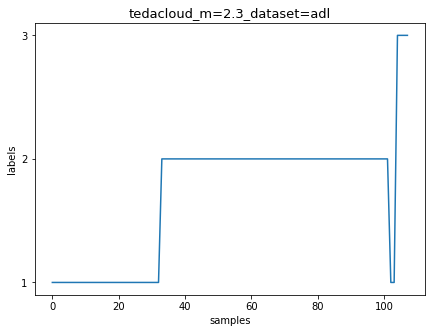

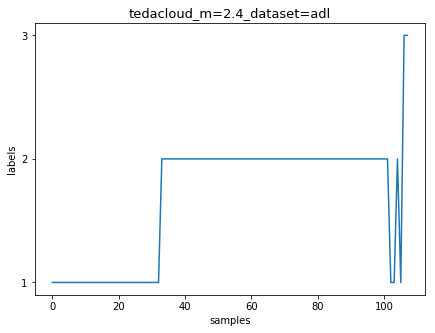

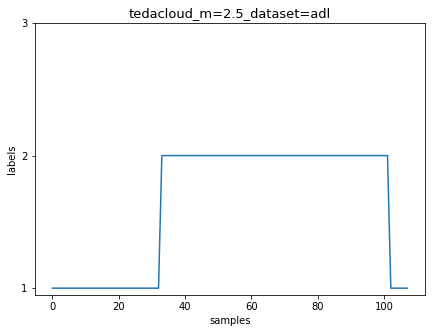

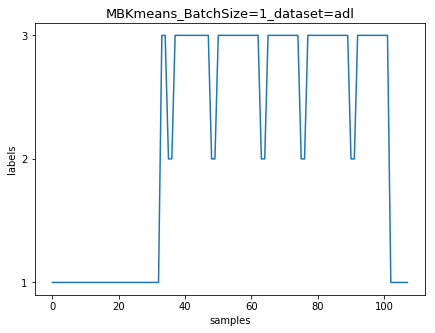

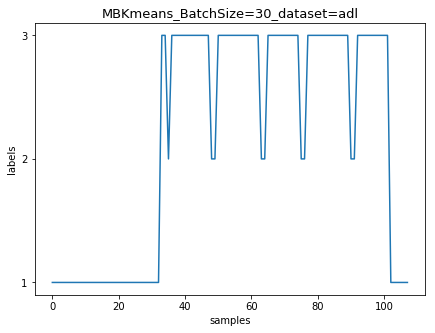

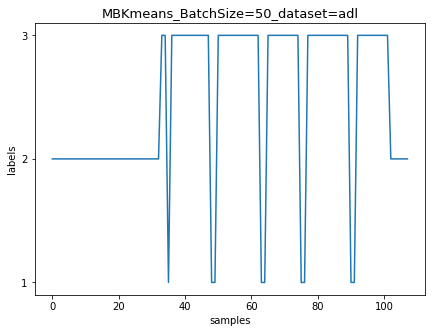

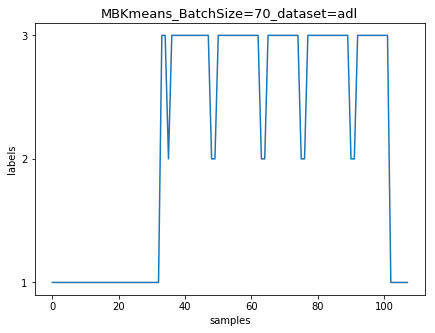

In [41]:
sample = list(dic_solution.keys())[0]

fig = plt.figure()
plt.plot(dic_solution[sample]['label_round_truth'])
plt.title('label_round_truth',size=14)
plt.yticks(np.arange(1, 4, 1))
plt.ylabel('labels')
plt.xlabel('samples')
# 5 - save figure
fig.savefig('output/results/label_truth_adl.png')
plt.show()

for solution in dic_solution.keys():
    fig = plt.figure()
    plt.plot(dic_solution[solution]['label_solution'])
    plt.title(solution, size=13)
    plt.yticks(np.arange(1, 4, 1))
    plt.ylabel('labels')
    plt.xlabel('samples')
    fig.savefig('output/results/'+solution+'.png')
    plt.show()

In [42]:
dic_solution.keys()

dict_keys(['tedacloud_m=1.2_dataset=adl', 'tedacloud_m=1.3_dataset=adl', 'tedacloud_m=1.4_dataset=adl', 'tedacloud_m=1.5_dataset=adl', 'tedacloud_m=1.6_dataset=adl', 'tedacloud_m=1.7_dataset=adl', 'tedacloud_m=1.8_dataset=adl', 'tedacloud_m=1.9_dataset=adl', 'tedacloud_m=2.0_dataset=adl', 'tedacloud_m=2.1_dataset=adl', 'tedacloud_m=2.2_dataset=adl', 'tedacloud_m=2.3_dataset=adl', 'tedacloud_m=2.4_dataset=adl', 'tedacloud_m=2.5_dataset=adl', 'MBKmeans_BatchSize=1_dataset=adl', 'MBKmeans_BatchSize=30_dataset=adl', 'MBKmeans_BatchSize=50_dataset=adl', 'MBKmeans_BatchSize=70_dataset=adl'])

In [49]:
aux = pd.DataFrame(dic_solution['MBKmeans_BatchSize=1_dataset=adl']['label_solution']).replace(3,4).replace(2,3).replace(4,2)

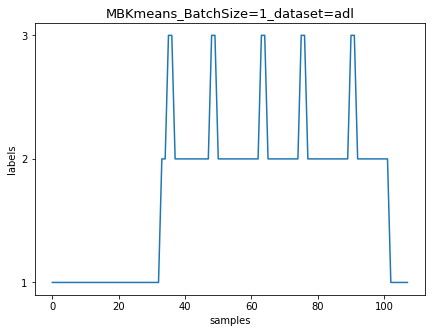

In [53]:
fig = plt.figure()
plt.plot(aux.values)
plt.title('MBKmeans_BatchSize=1_dataset=adl', size=13)
plt.yticks(np.arange(1, 4, 1))
plt.ylabel('labels')
plt.xlabel('samples')
fig.savefig('output/results/labe_kmenas.png')
plt.show()

In [52]:
print(round(metrics.silhouette_score(dic_solution['MBKmeans_BatchSize=1_dataset=adl']['dataset'], aux, metric='sqeuclidean'),3))
print(round(metrics.recall_score(dic_solution['MBKmeans_BatchSize=1_dataset=adl']['label_round_truth'], aux, average='micro'),3))

C:\Users\pedro.h.tavares\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.854
0.843
